### 实验介绍

#### 数据说明
该数据集是来自美国疾病控制预防中心的数据，背景是记录美国的糖尿病症状信息，现在美国1/7的成年人患有糖尿病。但是到2050年，这个比例将会快速增长至高达1/3。我们可以利用从UCI机器学习数据库里一个关于印第安人糖尿病数据集，通过数据挖掘相关算法来预测糖尿病，该问题本质上是一个二元分类问题。


In [76]:
!pip install sklearn
!pip install seaborn

### 挖掘流程

In [77]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

**步骤 1** 要求载入本地数据集(pima-indians-diabetes.data)，以dataframe形式存放后，命名为df

In [78]:
#引入相关支持的包
import pandas as pd
import numpy as np
#可以事先将提供的数据集存储在本地，此处对该地址进行引用即可
#注意文件所存放路径不要有中文，容易报错
df= pd.read_csv('pima-indians-diabetes.data',sep=',')
#并观察熟悉数据
print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


利用head函数，可以看到：糖尿病数据集由768个数据点组成，各有9个特征，特征分别是：怀孕次数，血糖，血压，皮脂厚度，胰岛素，BMI身体质量指数，糖尿病遗传函数，年龄和结果，此处是一个数据框格式，前8个特征均是数值型属性，最后1列是目标向量，是我们将要预测的特征，其中0意味着未患糖尿病，1意味着患有糖尿病。

**步骤 2** 查看数据尺寸、打印信息，判断特征的类型（名称性、数值型），目标变量分布以及查看是否均衡

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pregnancies              768 non-null    int64  
 1   Glucose                  768 non-null    int64  
 2   BloodPressure            768 non-null    int64  
 3   SkinThickness            768 non-null    int64  
 4   Insulin                  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   DiabetesPedigreeFuction  768 non-null    float64
 7   Age                      768 non-null    int64  
 8   Outcome                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**步骤 3** 对df特征进行相关性可视化

<AxesSubplot:>

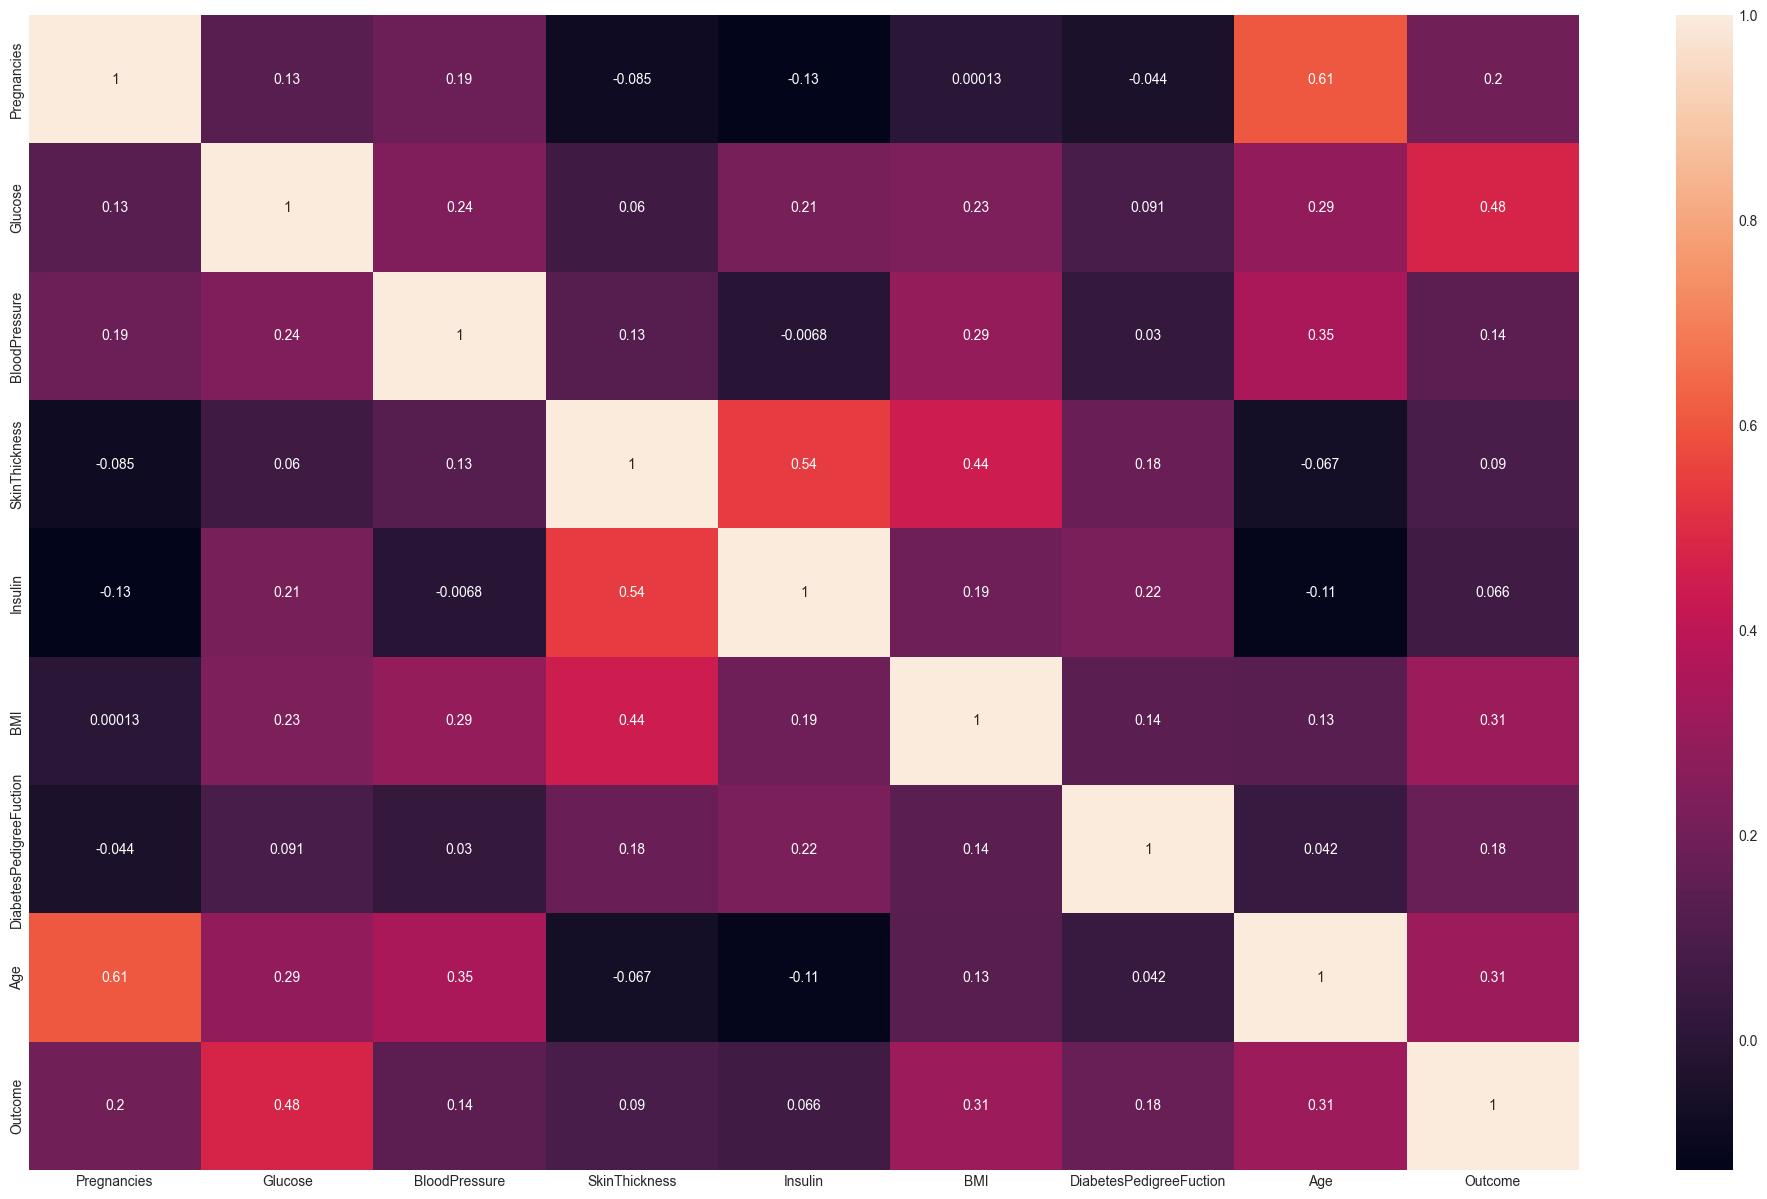

In [81]:
#导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#计算特征相关性并可视化
corr_matrix = df.corr(method='spearman') # pearson 皮尔逊, 是spearman 斯皮尔曼 
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True)


**步骤 4** 对df每个特征的分布进行可视化查看

In [82]:
import math
# 绘制每个特征的分布
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid') 
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # 调整图表位置和大小间距
    rows = math.ceil(float(dataset.shape[1]) / cols)# ceil方法向上取整
    for i, column in enumerate(dataset.columns): #返回索引和列名
        ax = fig.add_subplot(rows, cols, i + 1)# 创建子图，类似于subplot方法
        ax.set_title(column)	# 设置轴的标题
        if dataset.dtypes[column] == np.object: # 通过列的类型来区分所选取的图像类型
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25) 
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)



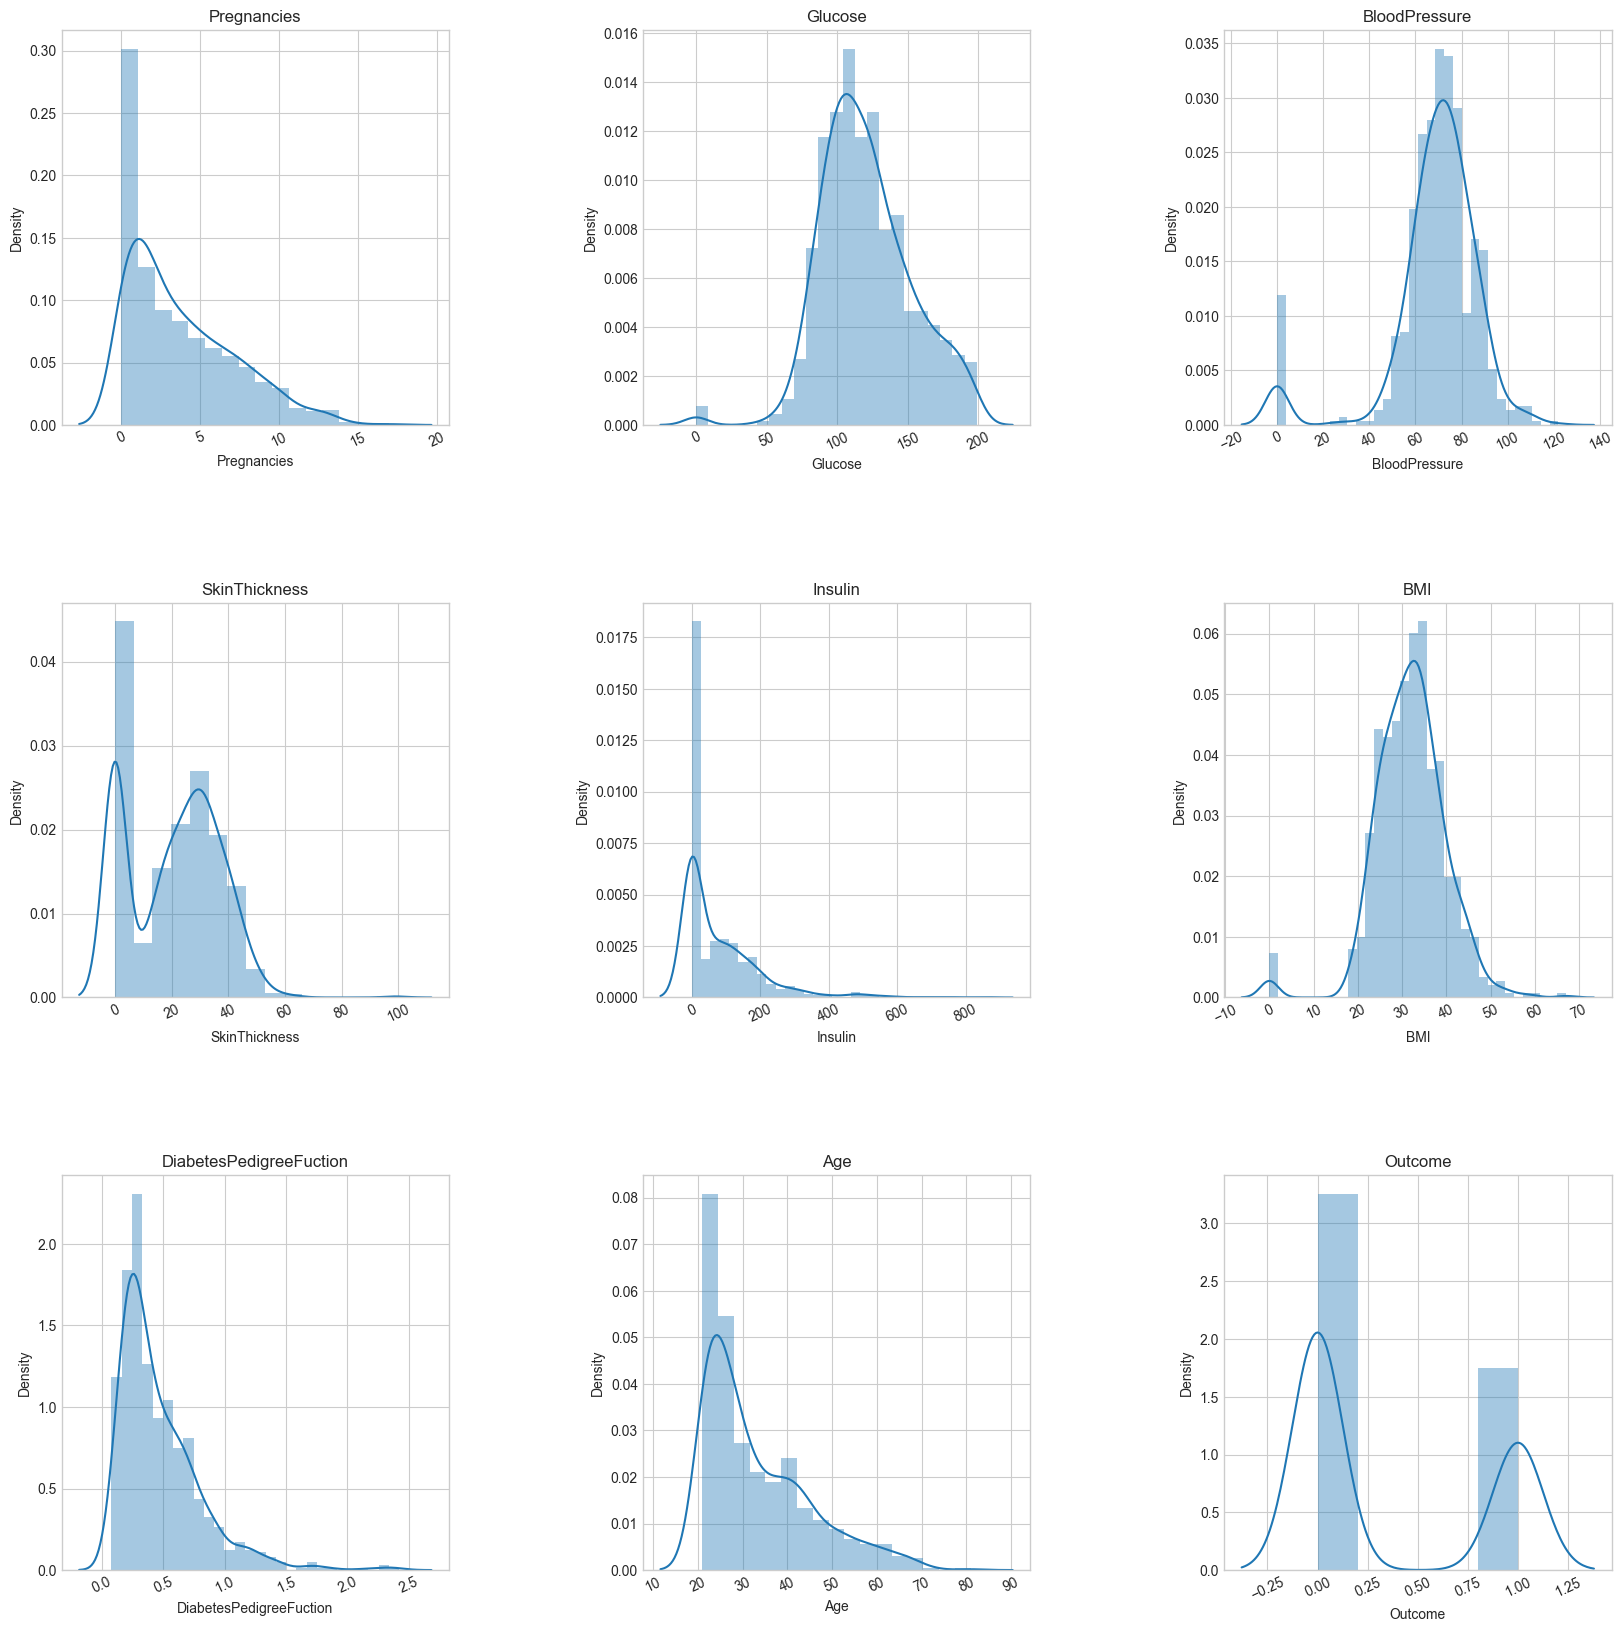

In [83]:
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [84]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in df.columns if col!='Outcome']
y_col = 'Outcome'
X=df[x_cols].values    #dataframe 转化为 ndarray,才能进入下面的标准化和3D制图
y=df[y_col].values


##### Axes3D 绘图函数
是mpl_toolkits.mplot3d中的一个绘图函数，mpl_toolkits.mplot3d
mpl_toolkits.mplot3d
p3d.Axes3D.scatter( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs )

p3d.Axes3D.scatter3D( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs)

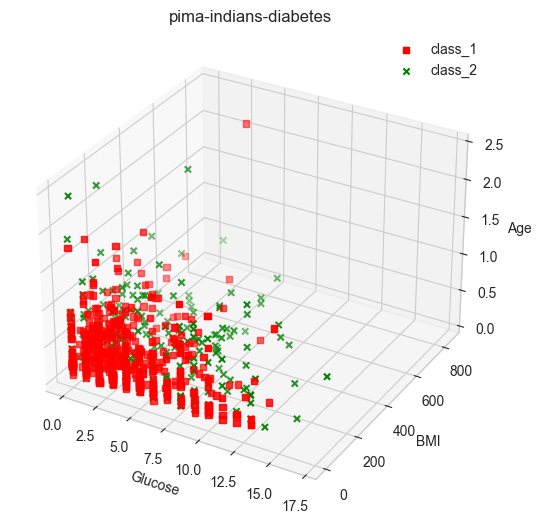

In [85]:
### 绘制3D散点图-3个维度的数据点的散点分布XXX
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
for c,m,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X[y==i ,0], X[y==i, 4], X[y==i, 6],c=c,marker=m, label=l)
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[5])
ax.set_zlabel(df.columns[7])
ax.set_title("pima-indians-diabetes")
plt.legend()
plt.show()


**步骤 5** 对输入特征进行降维，选择 PCA，并按提示补充如下代码中划线部分内容。

In [86]:
### 对输入特征进行降维处理
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X)
X_std= scaler.transform(X)
X_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.47610833,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36974705, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.59694482, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.67183826, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.36974705,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.46037442, -0.87137393]])

In [87]:
pca=PCA(n_components=0.99,svd_solver="full")
X_pca =pca.fit(X_std).transform(X_std)

In [88]:

print('the Top 95% variance_ratio:',pca.explained_variance_ratio_)

the Top 95% variance_ratio: [0.26185321 0.21640525 0.12862254 0.10946977 0.09528539 0.08533321
 0.05247248 0.05055815]


In [89]:
X_pca.shape 

(768, 8)

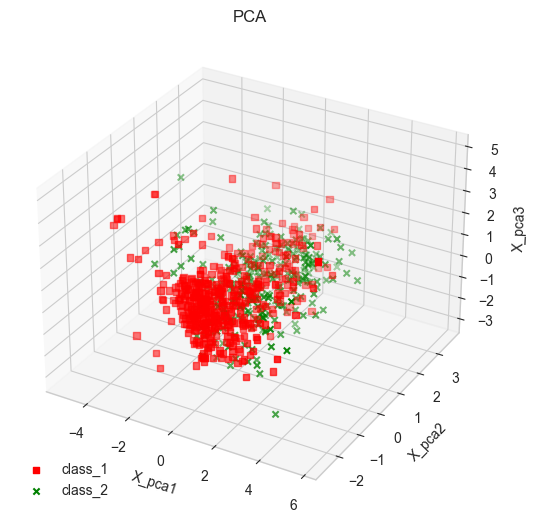

In [90]:
 ### 输出降维后的前3个主成分的分布图
ax = Axes3D(plt.figure())
for  c, m ,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X_pca[y==i, 0], X_pca[y==i,1],X_pca[y==i,2], c=c, label=l, marker=m) # 散点图
ax.set_xlabel('X_pca1')
ax.set_ylabel('X_pca2')
ax.set_zlabel('X_pca3')
ax.set_title("PCA")
plt.legend(loc='lower left')
plt.show()

#### 划分训练集与测试集

**步骤 6** 结合相关性分析和降维后的结论，选择数据进行拆分为训练集和测试集，拆分比例设置为 0.1，指定以 Target 的比例做分层抽样。

In [91]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split( X_pca,y,test_size=0.1, stratify=y)

In [92]:
print('Distribution of y_test',Counter(y_test))

Distribution of y_test Counter({0: 50, 1: 27})


In [93]:
print('Distribution of y_train',Counter(y_train))

Distribution of y_train Counter({0: 450, 1: 241})


**步骤 7** 选择逻辑回归算法对拆分后的数据进行建模训练和预测，其中要求将原始模型做5折交叉验证，评估指标选择f1。

In [94]:
#引入逻辑斯谛回归和交叉验证的库
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score


#引入评价指标的库
from sklearn.metrics import f1_score

#### 交叉验证评估原始模型
    1：交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
    2：还可以从有限的数据中获取尽可能多的有效信息。
sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,pre_dispatch=‘2*n_jobs’)
    estimator:估计方法对象(分类器)
    X：数据特征(Features)
    y：数据标签(Labels)
    soring：调用方法(包括accuracy和mean_squared_error等等)
    cv：几折交叉验证
    n_jobs：同时工作的cpu个数（-1代表全部）
返回值是：每次运行交叉验证的估计值数组。


In [95]:
#声明逻辑斯谛回归模型，solver使用liblinear，最大迭代次数为500

lr_model=LR(max_iter=500,solver='liblinear')

#对原始模型做交叉验证
cross_val_score(lr_model,X_train, y_train, cv=5,scoring='f1'  )


array([0.68181818, 0.66666667, 0.60240964, 0.61363636, 0.58426966])

In [96]:
#查看下当前模型
lr_model 

LogisticRegression(max_iter=500, solver='liblinear')

**步骤 8** 对逻辑回归的几个重要参数进行网格搜索

 ##### GridSearchCV()
   网格搜索（GridSearch）用于选取模型的最优超参数。获取最优超参数的方式可以绘制验证曲线，但是验证曲线只能每次获取一个最优超参数。如果多个超参数有很多排列组合的话，就可以使用网格搜索寻求最优超参数的组合。 
    estimator:选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。
    param_grid:需要最优化的参数的取值，值为字典或者列表，键命名必须为模型本身的参数名称
    scoring：模型评价标准，默认None(即选择的estimator的误差估计函数)。常为'f1','accuracy','recall','roc_auc',‘average_precision’
    cv=None,交叉验证参数，默认3

In [97]:
c_range=[0.001,0.01,0.1,1.0]
solvers = ['liblinear','lbfgs','newton-cg','sag']
max_iters=[80,100,150,200,300]
tuned_parameters= dict(solver=solvers, C=c_range,max_iter=max_iters)

In [98]:
#网格搜素
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(lr_model,param_grid = tuned_parameters) 
grid_result = grid.fit(X_train,y_train)
print("best score for model:", grid_result.best_score_)
print("best parameters for model:", grid.best_params_)


best score for model: 0.7669586070274216
best parameters for model: {'C': 1.0, 'max_iter': 80, 'solver': 'liblinear'}


**步骤 9** 根据搜索参数，最后确认模型，进行预测。

In [99]:
#### 根据选择后的参数，最后预测
lr= LR(C = 1.0, max_iter=80,solver='liblinear')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7792207792207793


**步骤 10** 采用SVM分类器对以上数据进行分类，并进行比较。

In [100]:
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel='rbf') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier.score(X_test,y_test))

0.7922077922077922


由结果可见差别不是很大